<a href="https://colab.research.google.com/github/chinnusai25/cvit-Workshop2020/blob/master/Day3(May28).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMAGE PROCESSING**(MORNING SESSION)

MORPHOLOGICAL OPERATIONS

**Erosion**<br>
Structuring Element is used to identify the shape which we actually want, size of the foreground object is reduced.
Boundary Extraction - Original Image - Erode(Original Image) => Condition for boundary extraction.<br>
Erosion with all 0's (i.e dont care) we get original image itself.


**Dilation**<br>
In dilation size of our object grows.<br>
Dilated(A)-A => Condition for boundary extraction


**Opening**<br>
To preserve the foreground image <br>
Erosion+Dilation

**Closing**<br>
To preserve the background image <br>
Dilation+Erosion

Trying to find the part of image where B1 in foreground and B2 in background

Erosion = A (hit and miss) B, B1=normal erosion filter(Structure Element), B2=0 matrix

1 for white pixel,-1 for black pixel,0 for dont care = Hit and miss

**Ex:**<br> Write a script which reads 'coin.jpg' as input and outputs a new <br>image containing:
<br>
only the coins touching the boundary of the image<br>
only the coins which overlap with each other. <br>
only non-overlapping coins.<br>


Eroding the circles/discs to a point and then removing all the circles which are at distance greater than 9 from bundary and dilating them again.

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go

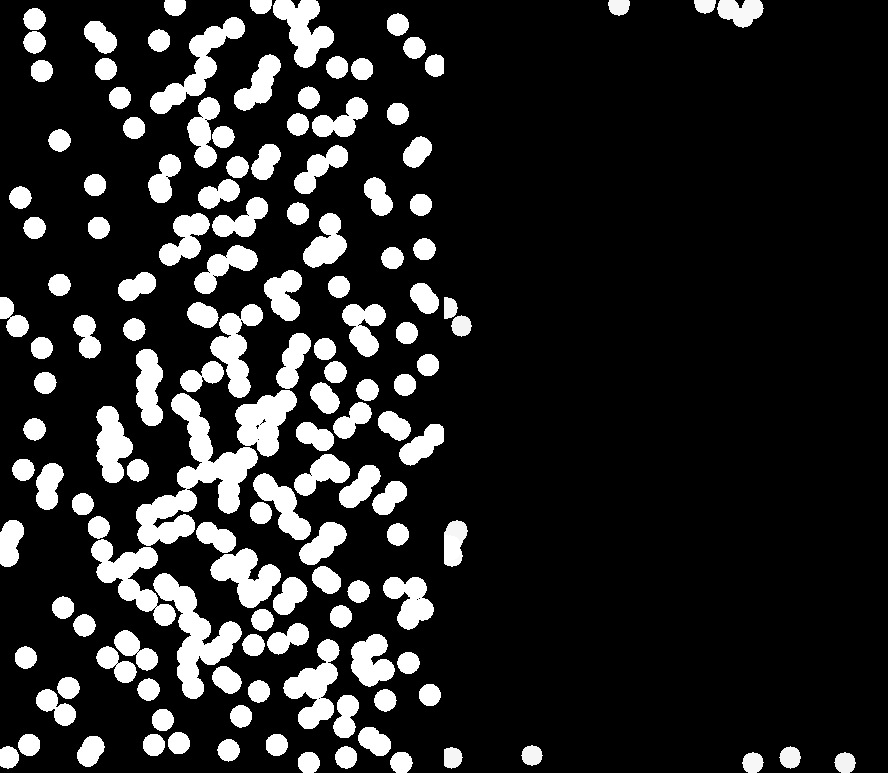

In [0]:
I=cv2.imread("/content/coins.jpg")
kernel = morp.disk(10)
I1=cv2.erode(I,kernel)
I1[18:I1.shape[0]-18,18:I1.shape[0]-18]=0
I1=cv2.dilate(I1,kernel)
cv2_imshow(np.hstack([I,I1]))

Number of coins non-overlapping = 62 

Number of coins overlapping = 207 



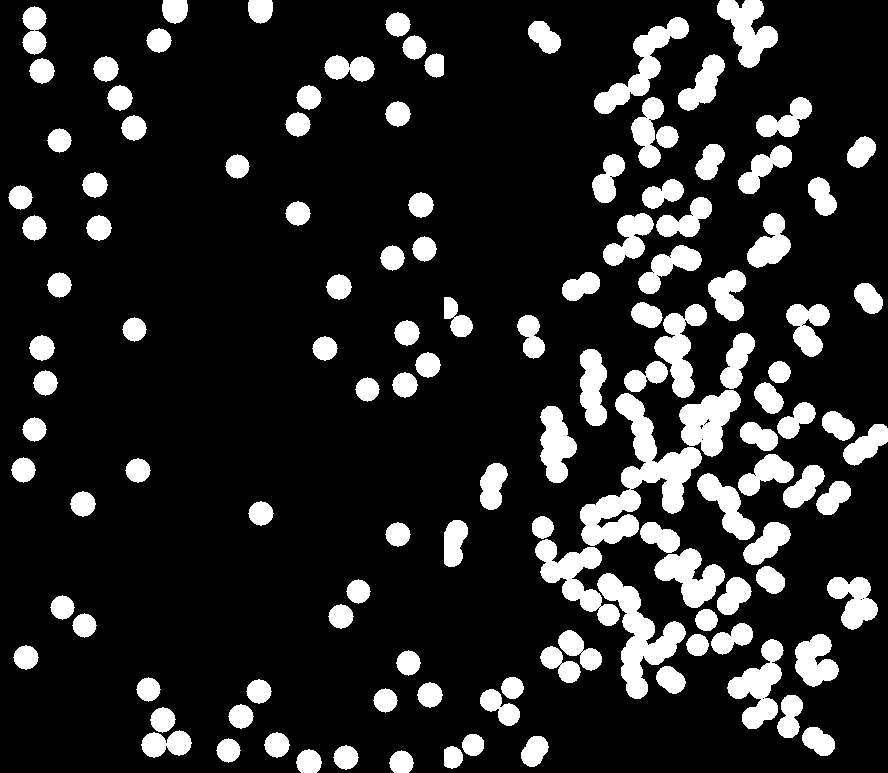

In [5]:
#Overlapping and non-overlapping coins
#Overlapping image is found by subtracting non-overlapping image from original image

I = cv2.imread('/content/coins.jpg', cv2.IMREAD_GRAYSCALE)
ret,I = cv2.threshold(I,127,255,cv2.THRESH_BINARY)


kernel = morp.disk(12,dtype='int')
for i in range(len(kernel)):
  for j in range(len(kernel[i])):
    if(i==0 or i==len(kernel)-1 or j==0 or j==len(kernel)-1):
      kernel[i][j]=-1
    if(kernel[i][j]==1 and( i!=12 or j!=12)):
      kernel[i][j]=0





erosion = cv2.erode(I,morp.disk(10,np.uint8),iterations = 1)
output_image = cv2.morphologyEx(I, cv2.MORPH_HITMISS, kernel)

kernel = morp.disk(12,np.uint8)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0


for i in range(len(output_image)):
  for j in range(len(output_image[i])):
    if output_image[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(output_image),i+11)):
          for l in range(max(0,j-11),min(len(output_image[i]),j+11)):
            flag[k][l]=1
print("Number of coins non-overlapping =",count,"\n")



dilation = cv2.dilate(output_image,kernel,iterations = 1)
I2=I-dilation



erosion = cv2.erode(I2,morp.disk(10,np.uint8),iterations = 1)

flag=np.zeros((erosion.shape[0],erosion.shape[1]))
count=0
for i in range(len(erosion)):
  for j in range(len(erosion[i])):
    if erosion[i][j]==255:
      if(flag[i][j]==0):
        count+=1
        for k in range(max(0,i-11),min(len(erosion),i+11)):
          for l in range(max(0,j-11),min(len(erosion[i]),j+11)):
            flag[k][l]=1
print("Number of coins overlapping =",count,"\n")


cv2_imshow(np.hstack([dilation,I2]))

In [0]:
I=cv2.imread("/content/coins.jpg")
kernel = morp.disk(10)
I1=cv2.hitandmiss(I,kernel)
# I1[10:I1.shape[0]-10,10:I1.shape[0]-10]=0
# I1=cv2.dilate(I1,kernel)
cv2_imshow(np.hstack([I1]))

AttributeError: ignored

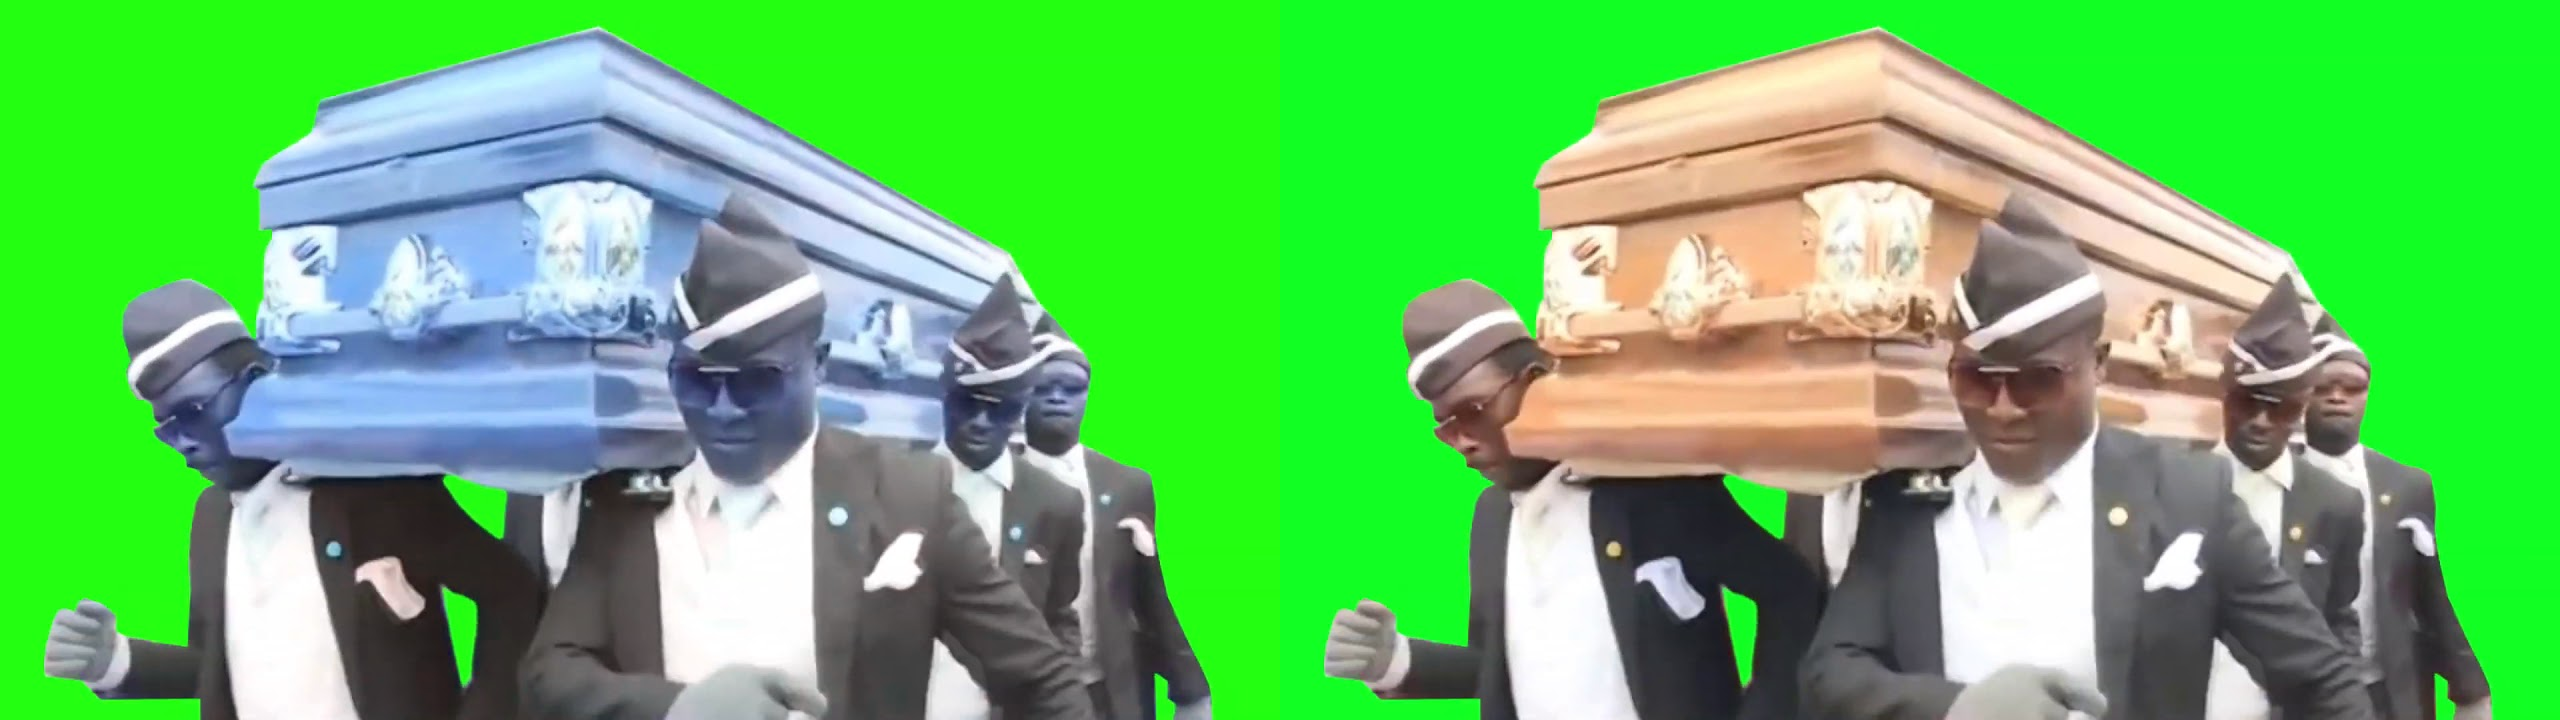

In [0]:
I=cv2.imread("/content/chroma_key.jpg")
I1=cv2.imread("/content/chroma_key.jpg")
# cv2_imshow(I)
I[0][1]
for i in range(len(I)):
  for j in range(len(I[0])):
    temp=I[i][j][0]
    I[i][j][0]=I[i][j][2]
    I[i][j][2]=temp
cv2_imshow(np.hstack([I,I1]))

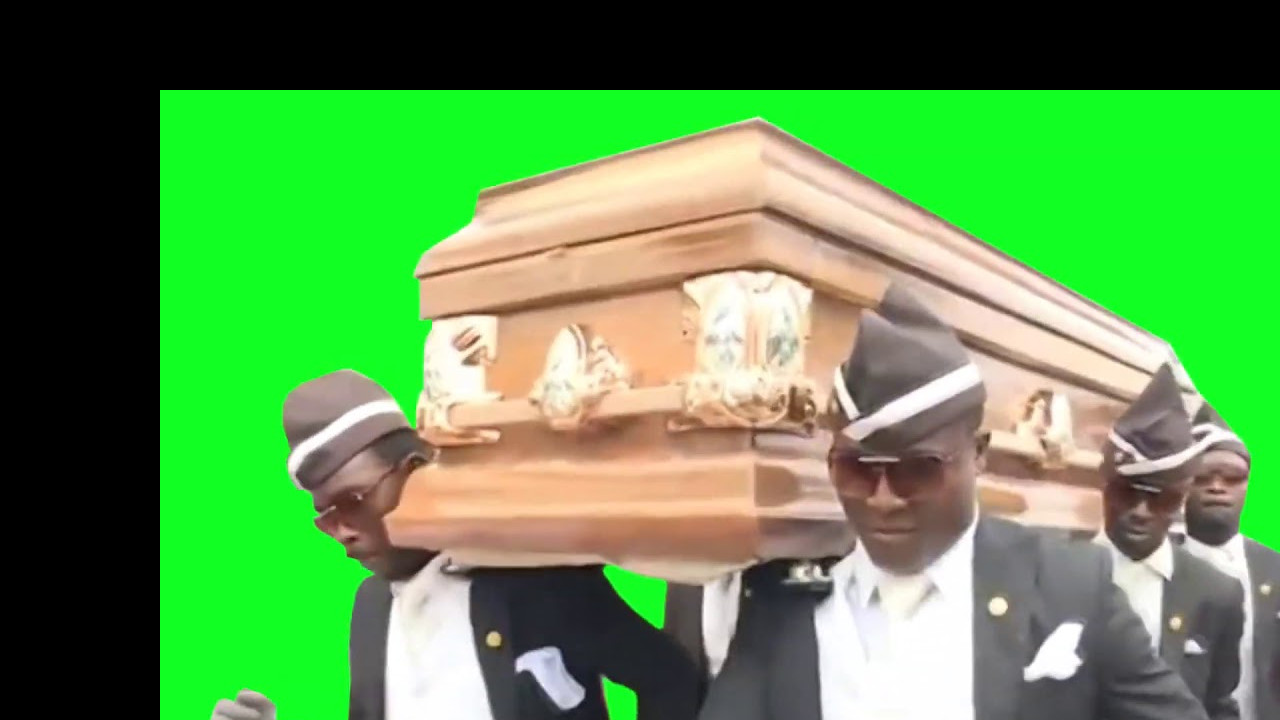

In [0]:
#Translating an Image
I=cv2.imread("/content/chroma_key.jpg")
ht,wdt,channels = I.shape
T = np.float32([[1,0,wdt/8],[0,1,ht/8]])
I1=cv2.warpAffine(I,T,(wdt,ht))
cv2_imshow(I1)

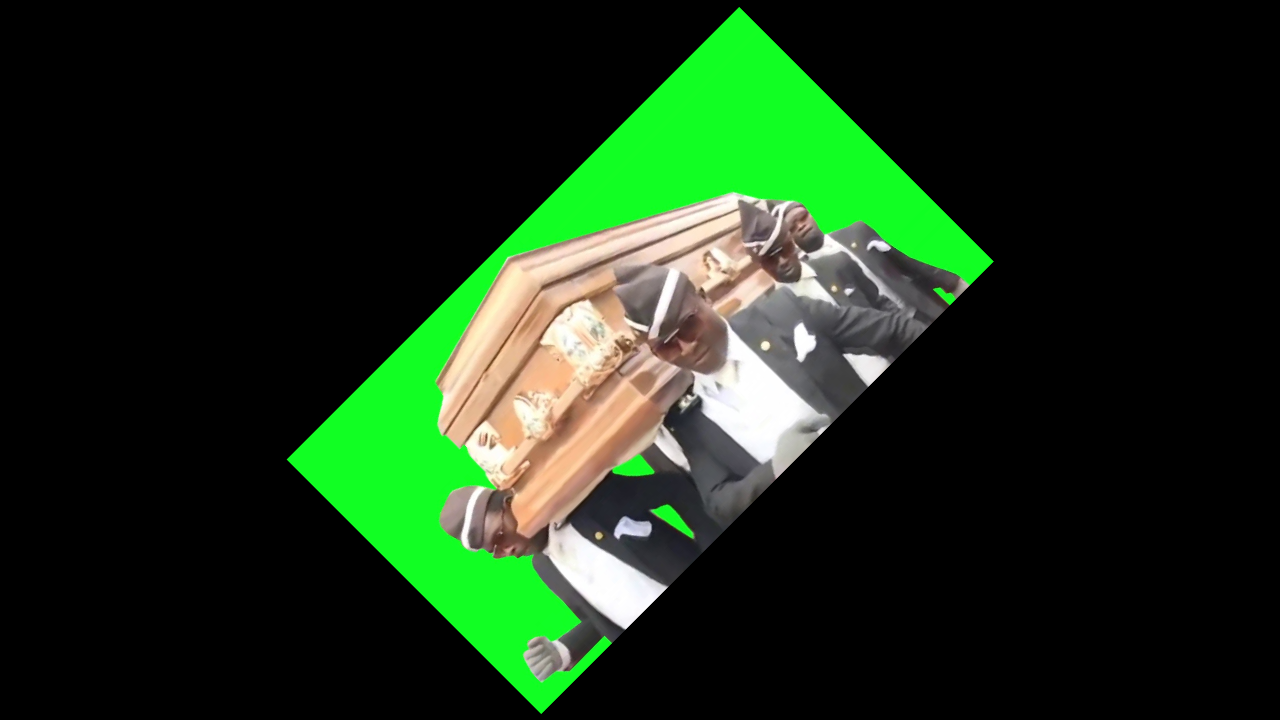

In [0]:
#Rotaion
M1=cv2.getRotationMatrix2D((wdt/2,ht/2),45,0.5)
I1=cv2.warpAffine(I,M1,(wdt,ht))
cv2_imshow(I1)

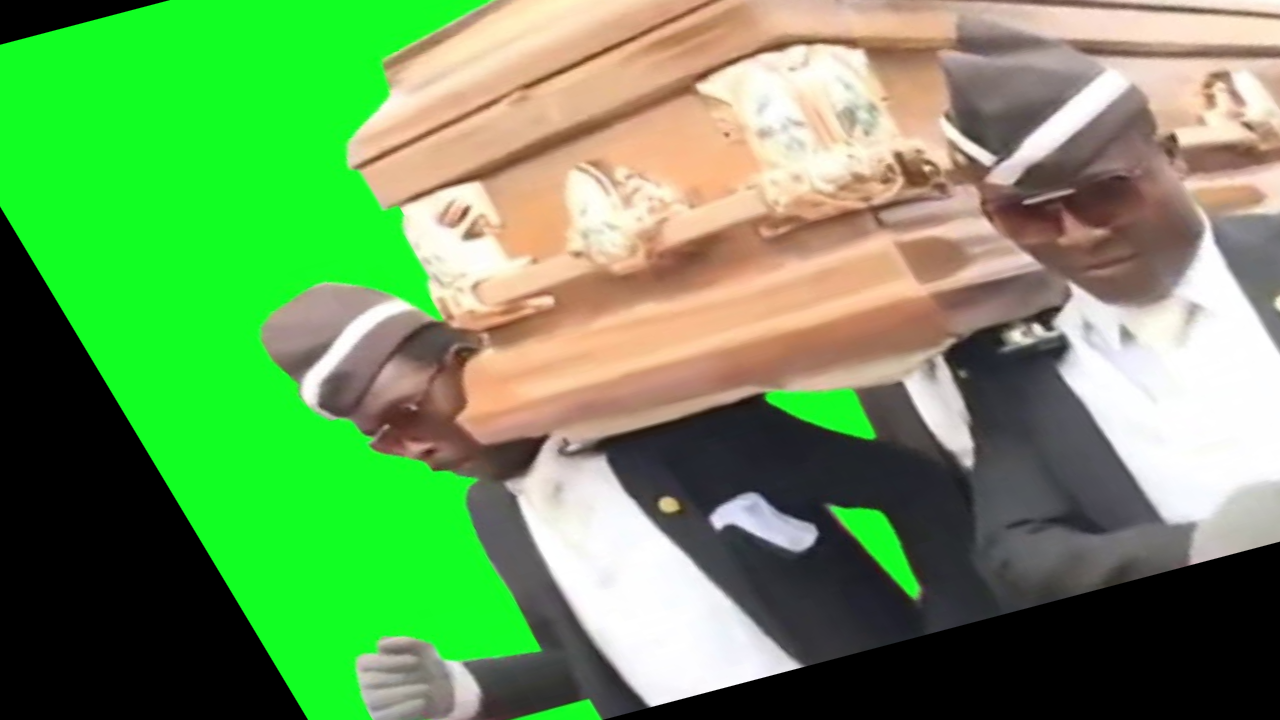

In [0]:
#Affine transformation mapping between two points
pt1=np.float32([[50,50],[200,50],[50,200]])
pt2=np.float32([[10,100],[200,50],[100,250]])
M=cv2.getAffineTransform(pt1,pt2)
I1=cv2.warpAffine(I,M,(wdt,ht))
cv2_imshow(I1)

49.76364169072618


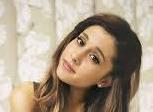

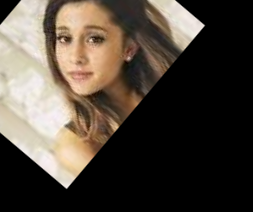

In [0]:
#aligning the faces
import math
pt1=[77,37]
pt2=[116,70]
pt3=[116,37]
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
print(getAngle(pt1,pt2,pt3))

I=cv2.imread("/content/tilted_face.jpg")
ht,wdt,channels = I.shape
M1=cv2.getRotationMatrix2D((wdt/2,ht/2),getAngle(pt1,pt2,pt3),1.4)
I1=cv2.warpAffine(I,M1,(wdt+100,ht+100))
cv2_imshow(np.hstack([I]))
cv2_imshow(np.hstack([I1]))

82.40535663140857


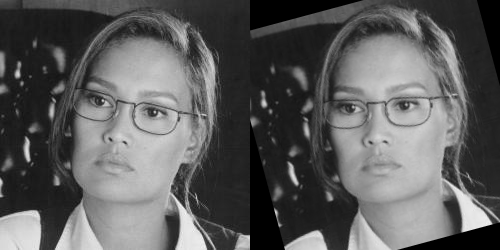

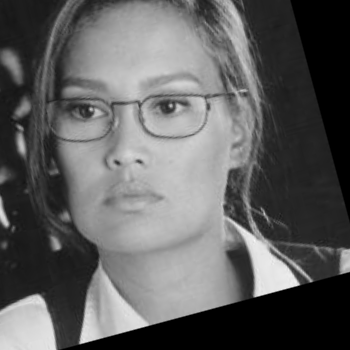

In [0]:
#aligning the faces
import math
pt1=[90,100]
pt2=[165,110]
pt3=[165,100]
def getAngle(a, b, c):
    ang = math.degrees(math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang
print(getAngle(pt1,pt2,pt3))

I=cv2.imread("/content/face.jpg")
ht,wdt,channels = I.shape
M1=cv2.getRotationMatrix2D((127,102),15,1)
M2=cv2.getRotationMatrix2D((127,102),15,1.5)
I1=cv2.warpAffine(I,M1,(wdt,ht))
I2=cv2.warpAffine(I,M2,(wdt+100,ht+100))
cv2_imshow(np.hstack([I,I1]))
cv2_imshow(np.hstack([I2]))

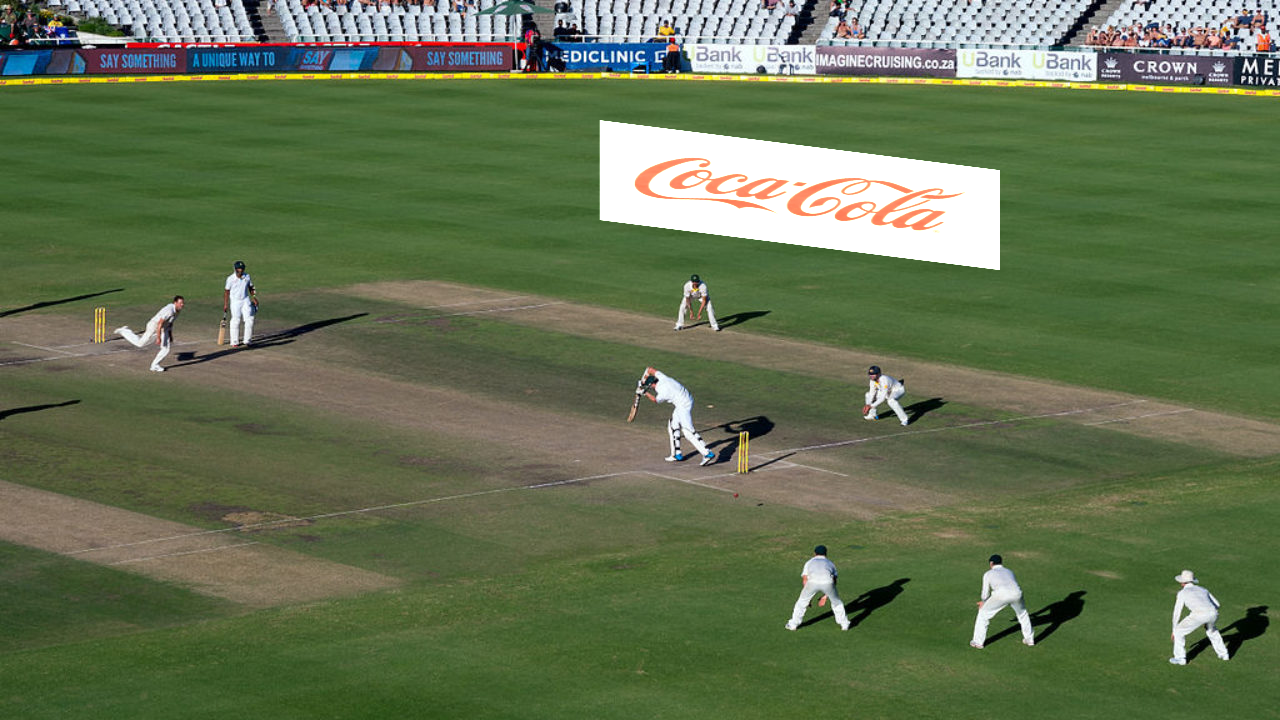

In [0]:
I1=cv2.imread("/content/coca.jpg")
I2=cv2.imread("/content/stadium.jpg")
pts1 = np.float32([[0,0],[0,179],[320, 0],[320,179]]) # cola coords 
pts2 = np.float32([[600,120],[600, 220],[1000, 170],[1000, 270]]) # stadium tile coords
M,status=cv2.findHomography(pts1,pts2)
I=cv2.warpPerspective(I1,M,(I2.shape[1],I2.shape[0]))
# cv2_imshow(np.hstack([I,I1]))
final=cv2.add(I2,I)
cv2_imshow(final)

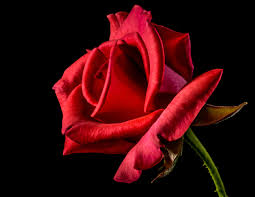

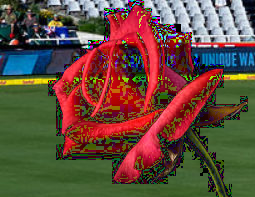

In [0]:
I=cv2.imread("/content/rose.jpeg")
I1=cv2.imread("/content/stadium.jpg")

cv2_imshow(I)
for i in range(len(I)):
  for j in range(len(I[0])):
    for k in range(len(I[0][0])):
      if(I[i][j][k]==0):
        I[i][j][k]=I1[i][j][k]
cv2_imshow(I)


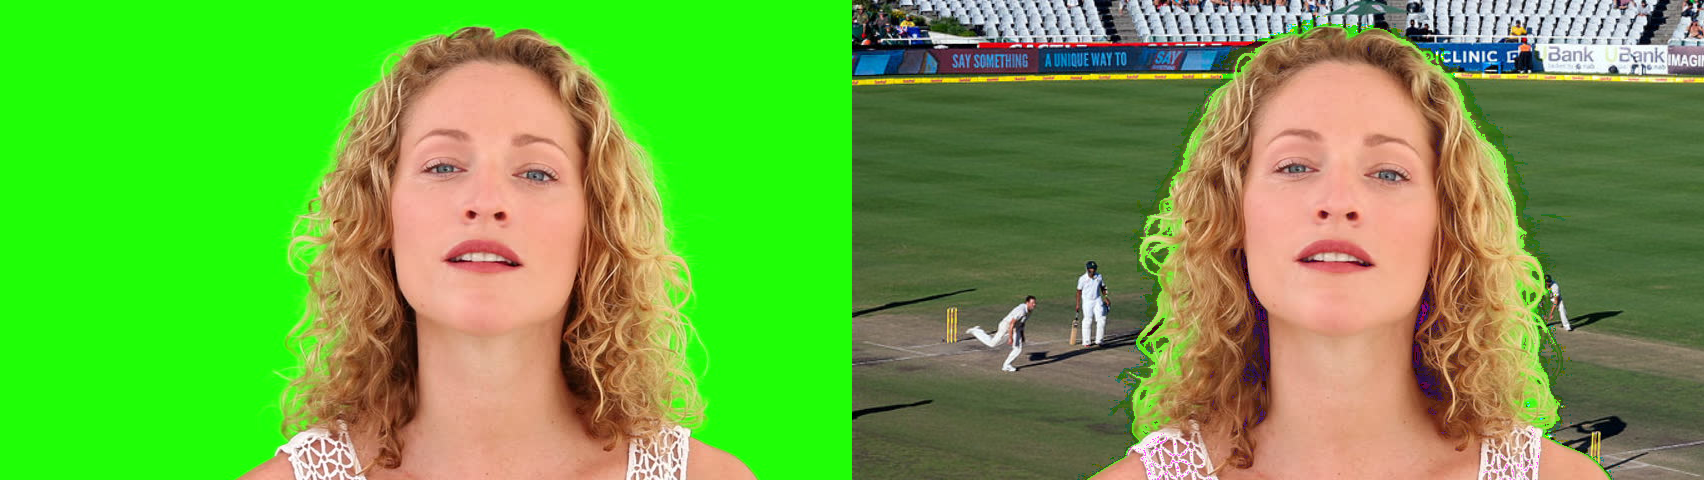

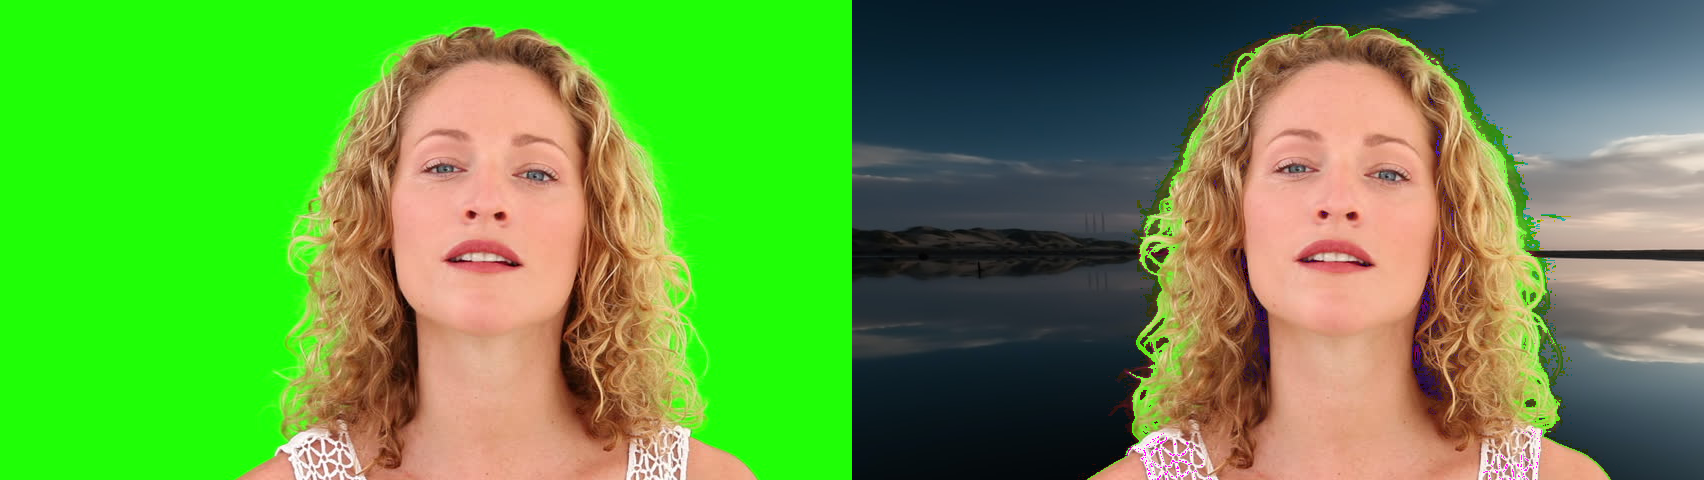

In [0]:
I=cv2.imread("/content/chroma_img.jpg")
I4=cv2.imread("/content/chroma_img.jpg")
I2=cv2.imread("/content/chroma_img.jpg")
I1=cv2.imread("/content/stadium.jpg")
I3=cv2.imread("/content/sce.jpeg")

# cv2_imshow(I)
# print(I[0][0][0])
# print(I[0][1][1])
# print(I[0][2])
me=[6,255,31]
for i in range(len(I)):
  for j in range(len(I[0])):
    for k in range(len(I[0][0])):
      if(abs(I[i][j][k]-me[k])<=5):
        I[i][j][k]=I1[i][j][k]
        I4[i][j][k]=I3[i][j][k]
cv2_imshow(np.hstack([I2,I]))
cv2_imshow(np.hstack([I2,I4]))


In [0]:
I=cv2.imread("/content/text2_1.png")
I1=np.zeros([I.shape[0],I.shape[1]])
count=0
me=I[0][0]
print(me)
for i in range(len(I)):
  for j in range(len(I[0])):
    if(I[i][j][0]!=me[0] and I[i][j][1]!=me[1] and I[i][j][2]!=me[2]):
      # for k in range(3):
      if(I[i][j][0]==I[i][max(0,j-1)][0] and I[i][j][1]==I[i][max(0,j-1)][1] and I[i][j][2]==I[i][max(0,j-1)][2] ):
        I1[i][j]=I1[i][max(0,j-1)]
      elif (I[i][j][0]==I[max(0,i-1)][j][0] and I[i][j][1]==I[max(0,i-1)][j][1] and I[i][j][2]==I[max(0,i-1)][j][2]):
        I1[i][j]=I1[max(0,i-1)][j]
      else:
        I1[i][j]=count
        count=count+1
# cv2_imshow(I)
# print(count)
par=[]
hgt,wdt,ch=I.shape
print(ch)
for i in range(len(I)):
  for j in range(len(I[0])):
    if(I[i][j][0]!=me[0] and I[i][j][1]!=me[1] and I[i][j][2]!=me[2]):
      # for k in range(3):
      if(I1[i][j]!=I1[i][max(0,j-1)] and I1[i][max(0,j-1)]!=0 ):
        par.append([I1[i][j],I1[i][max(0,j-1)]])
        # break
      elif(I1[i][j]!=I1[max(0,i-1)][j] and I1[max(0,i-1)][j]!=0):
        par.append([I1[i][j],I1[max(0,i-1)][j]])
        # break
      # elif(I1[i][j]!=I1[min(i+1,hgt-1)][j]):
      #   par.append([I1[i][j],I1[min(i+1,hgt-1)][j]])
      #   # break
      # elif(I1[i][j]!=I1[i][min(wdt-1,j+1)]):
      #   par.append([I1[i][j],I1[i][min(wdt-1,j+1)]])
      #   # break
print(len(par))
print(count)
arr = []
for item in range(count):
    arr.append([])
print(par)
res=0
for i in range(count):
  flag=0
  for j in range(i):
    for k in range(len(arr[j])):
      if(arr[j][k]==int(par[i][1]) and flag==0):
        flag=1
        arr[j].append(int(par[i][0]))
        break
    if(flag==1):
      break
  if(flag==0):
    arr[int(par[i][1])].append(int(par[i][0]))

res=0
for i in range(count):
  if(len(arr[i])!=0):
    res=res+1
print("Number of different components",res)
print(arr)


[214 235 252]
3
7949
3514
[[2.0, 1.0], [3.0, 2.0], [4.0, 3.0], [5.0, 4.0], [6.0, 5.0], [7.0, 6.0], [8.0, 7.0], [10.0, 9.0], [11.0, 10.0], [11.0, 1.0], [11.0, 2.0], [11.0, 3.0], [11.0, 4.0], [11.0, 4.0], [11.0, 4.0], [11.0, 5.0], [11.0, 6.0], [11.0, 7.0], [12.0, 11.0], [13.0, 12.0], [14.0, 13.0], [16.0, 15.0], [17.0, 16.0], [19.0, 18.0], [20.0, 19.0], [21.0, 20.0], [23.0, 22.0], [24.0, 23.0], [25.0, 24.0], [27.0, 26.0], [28.0, 27.0], [30.0, 29.0], [31.0, 30.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 11.0], [31.0, 12.0], [31.0, 13.0], [32.0, 31.0], [33.0, 32.0], [15.0, 33.0], [16.0, 15.0], [17.0, 16.0], [19.0, 18.0], [20.0, 19.0], [21.0, 20.0], [23.0, 22.0], [24.0, 23.0], [25.0, 24.0], [35.0, 34.0], [36.0, 35.0], [37.0, 36.0], [27.0, 26.0], [28.0, 27.0], [39.0, 38.0], [40.0, 39.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40.0, 31.0], [40